In [36]:
%reload_ext autoreload
%autoreload 2
import os
import ray
import numpy as np

from skimage.feature import hog
from util import *

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
PATH = "train/"
files = []
classes = []
for direc in os.listdir(PATH):
    for file in os.listdir(PATH + direc):
        files.append(direc + "/" + file)
        if direc=="Covid":
            classes.append(1)
        else:
            classes.append(0)

In [20]:
images = []
for file in files:
    img = read_image(PATH, file)
    try:
        temp = hog(img, channel_axis=2)
    except:
        temp = hog(img)
    finally:
        images.append(temp)

In [22]:
images = np.array(images)

In [23]:
images.shape

(251, 72900)

In [25]:
len(files), len(classes)

(251, 251)

In [45]:
model = SVC(kernel="linear", degree=2).fit(
    X=images,
    y=classes
)

In [46]:
model.score(images, classes)

1.0

In [30]:
test_files = []
test_classes = []
TEST_PATH="test/"
for direc in os.listdir(TEST_PATH):
    for file in os.listdir(TEST_PATH + direc):
        test_files.append(direc + "/" + file)
        if direc=="Covid":
            test_classes.append(1)
        else:
            test_classes.append(0)

In [31]:
test_images = []
for file in test_files:
    img = read_image(TEST_PATH, file)
    try:
        temp = hog(img, channel_axis=2)
    except:
        temp = hog(img)
    finally:
        test_images.append(temp)


In [32]:
test_images = np.array(test_images)

In [47]:
model.score(test_images, test_classes)

0.9696969696969697

In [48]:
preds = model.predict(test_images)

In [49]:
print(classification_report(test_classes,preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.96      0.96      0.96        26

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



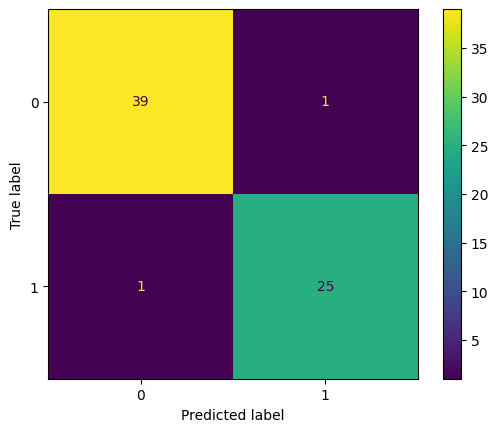

In [50]:
ConfusionMatrixDisplay(
    confusion_matrix(test_classes, preds)
).plot()

Even for a svm with a linear kernel, explendid results